In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data=pd.read_csv('./income.csv')
data.shape
data.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


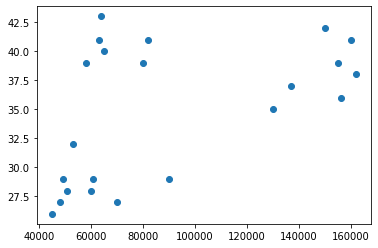

In [7]:
plt.scatter(data['Income($)'], data['Age'])

In [8]:
KM=KMeans(n_clusters=3)

In [17]:
Predection=KM.fit_predict(data[['Age','Income($)']])
Predection

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [18]:
data['clustering']=Predection

In [19]:
data.shape

(22, 4)

In [20]:
data.head(5)

,Name,Age,Income($),clustering
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [31]:
data1=data[data['clustering'].values==0]
data2=data[data['clustering'].values==1]
data3=data[data['clustering'].values==2]
data1.head(5)

,Name,Age,Income($),clustering
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0


Text(0, 0.5, 'Income')

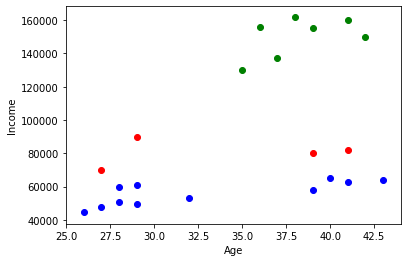

In [34]:
plt.scatter(data1['Age'],data1['Income($)'], color='red')
plt.scatter(data2['Age'],data2['Income($)'], color='green')
plt.scatter(data3['Age'],data3['Income($)'], color='blue')
plt.xlabel('Age')
plt.ylabel('Income')

### This Happens Because of Scaling, Hence we will scale out feature properly

In [39]:
scaler=MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)']=scaler.transform(data[['Income($)']])

# Scaling Age as well
#scaler.fit(data.Age)
#data.Age=scaler.transform(data.Age)
scaler.fit(data[['Age']])
data['Age']=scaler.transform(data[['Age']])

Text(0, 0.5, 'Income')

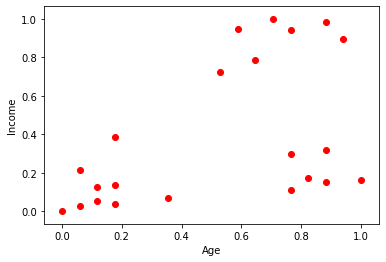

In [43]:
plt.scatter(data['Age'],data['Income($)'], color='red')
plt.xlabel('Age')
plt.ylabel('Income')

In [45]:
KM=KMeans(n_clusters=3)
Predection1=KM.fit_predict(data[['Age','Income($)']])
Predection

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [46]:
data

,Name,Age,Income($),clustering
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [47]:
data1=data[data['clustering'].values==0]
data2=data[data['clustering'].values==1]
data3=data[data['clustering'].values==2]
data1.head(5)

,Name,Age,Income($),clustering
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0


No handles with labels found to put in legend.


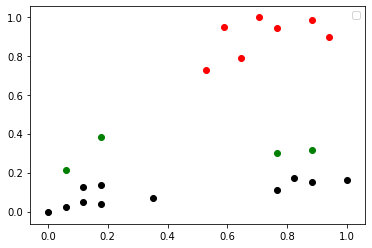

In [51]:
data1 = data[data.clustering==0]
data2 = data[data.clustering==1]
data3 = data[data.clustering==2]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


## Drawing Elbow Plot to Find correct Value of K through SSE

In [53]:
sse=[]
for k in range(1,10):
    KM=KMeans(n_clusters=k)
    KM.fit(data[['Age','Income($)']])
    sse.append(KM.inertia_)

Text(0, 0.5, 'SSE')

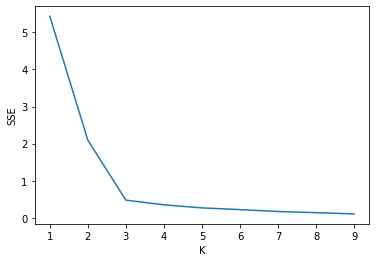

In [55]:
plt.plot(range(1,10),sse)
plt.xlabel("K")
plt.ylabel('SSE')